# AutoEncoders

In [1]:
import logging
import torch 

from aicraft.utils.loaders import FashionMNISTLoader
from aicraft.utils.visualise import Visualisations
from aicraft.models.AutoEncoderTrainers import AutoEncoderTrainer
from aicraft.models.autoencoder.model import AutoEncoder

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

DEBUG_MODE = True

if torch.cuda.is_available():
    logger.info("Using GPU")
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    logger.info("Using MPS")
    device = torch.device("mps")
else:
    logger.info("Using CPU")
    device = torch.device("cpu")

device

INFO:__main__:Using MPS


device(type='mps')

# Load Data & Transform

In [2]:
data = FashionMNISTLoader(val_split=0.1)
train_loader, validation_loader, test_loader = data.get_loaders()
label_mapper = {v: k for k, v in test_loader.dataset.class_to_idx.items()}
logger.info(f"Train: {len(train_loader)} Validation: {len(validation_loader)} Test: {len(test_loader)}")

INFO:__main__:Train: 1174 Validation: 131 Test: 218


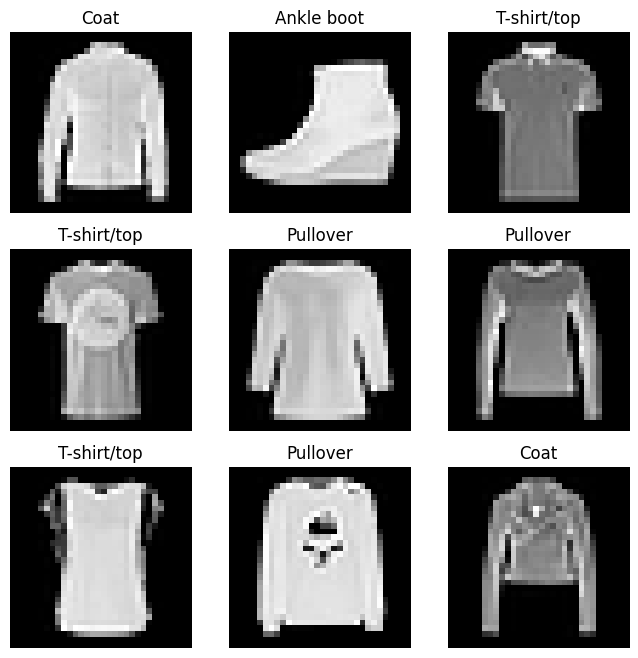

In [3]:
Visualisations.show_images(data.train)

# Defining an AutoEncoder

In [4]:
# Instantiate the model
autoencoder = AutoEncoder(embedding_size=2)

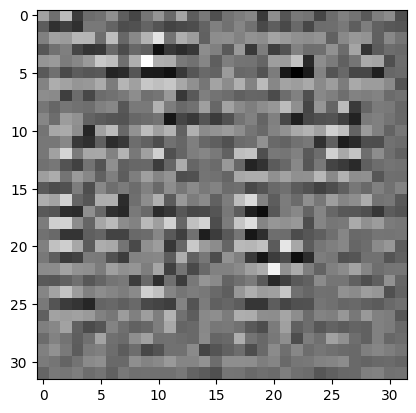

In [5]:
_batch, _labels = next(iter(train_loader))
_batch_reconstructed = autoencoder(_batch)
Visualisations.show_image(_batch_reconstructed[0])

## Training

In [6]:
# Trainer
optimiser = torch.optim.Adam(autoencoder.parameters(), lr=0.001, weight_decay=0.0005)
exponential_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimiser, gamma=0.99)
AutoEncoderTrainer.train(
    tl=train_loader, 
    vl=validation_loader, 
    model=autoencoder, 
    loss_fn=torch.nn.functional.binary_cross_entropy, 
    optimiser=optimiser, 
    scheduler=exponential_scheduler, 
    epochs=20, 
    device=device
)

Auto-Encoder Training: 100%|██████████| 1174/1174 [00:18<00:00, 63.19it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 1, Loss: 0.3396923502675516, Validation Loss: 0.2801623551445153
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 0: [0.00099]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:18<00:00, 65.06it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 2, Loss: 0.27155243478448876, Validation Loss: 0.268243889431007
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 1: [0.0009801]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:17<00:00, 66.32it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 3, Loss: 0.2619286621754173, Validation Loss: 0.25999611320386407
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 2: [0.000970299]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:17<00:00, 66.23it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 4, Loss: 0.2583461553492985, Validation Loss: 0.25877160254780573
INFO:aicraft.models.AutoEncoderTrainers:LRs for

In [8]:
_val_loss = AutoEncoderTrainer.validate(
    vl=test_loader,
    model=autoencoder,
    loss_fn=torch.nn.functional.binary_cross_entropy,
    device=device
)
logging.info(
    f"Post-training loss: {round(_val_loss, 4)}"
)

INFO:root:Post-training loss: 0.2542


## Test & Evaluate

In [9]:
_batch, _t_labels = next(iter(train_loader))
_batch = _batch.to(device)
_batch_reconstructed = autoencoder(_batch)

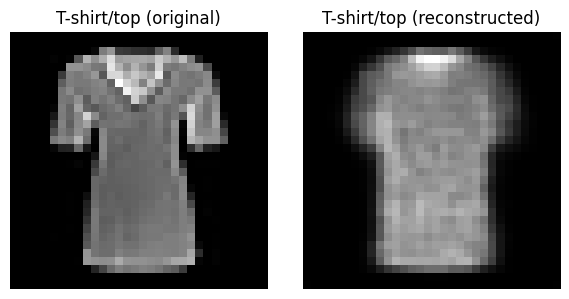

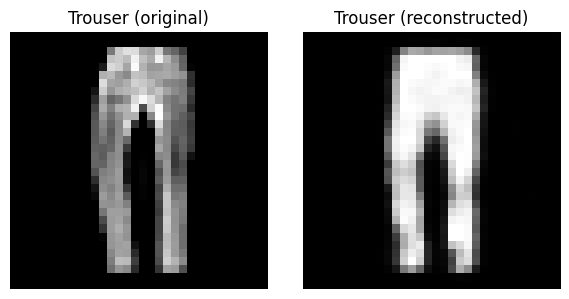

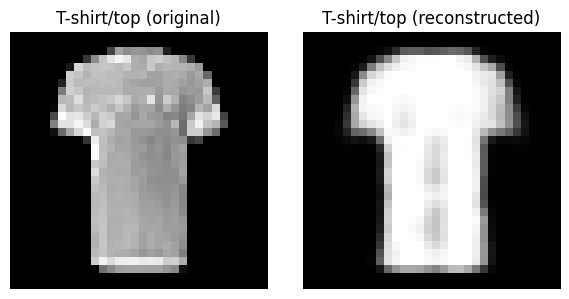

In [10]:
for i in range(3):
    Visualisations.compare_images(_batch[i], _batch_reconstructed[i], label=label_mapper[_t_labels[i].item()])

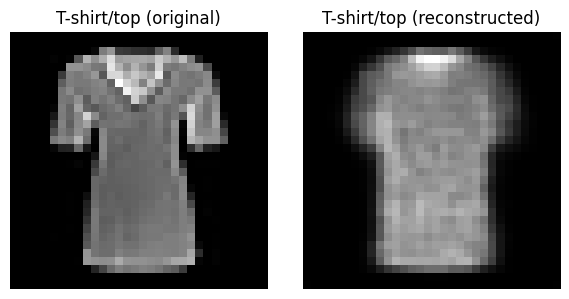

In [11]:
embeddings = autoencoder.encoder(_batch)
original = _batch[0]
reconstructed = autoencoder.decoder(embeddings[0].unsqueeze(0))
Visualisations.compare_images(original, reconstructed, label=label_mapper[_t_labels[0].item()])

In [12]:
embeddings, labels = autoencoder.generate_embedding(x=test_loader, device=device)
logger.info(f"Size of embeddings: {embeddings.shape}")

INFO:__main__:Size of embeddings: torch.Size([10000, 2])


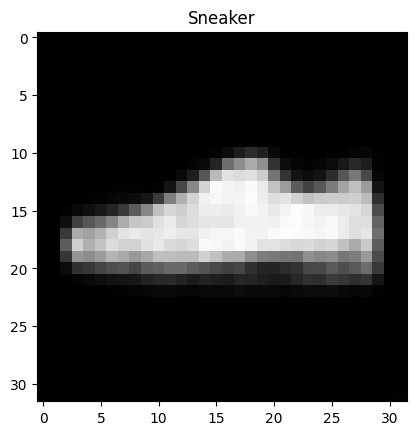

In [15]:
i = 1
reconstructed = autoencoder.decoder(embeddings[i].unsqueeze(0))
Visualisations.show_image(reconstructed[0], label=label_mapper[labels[i].item()])

INFO:__main__:Labels: 
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


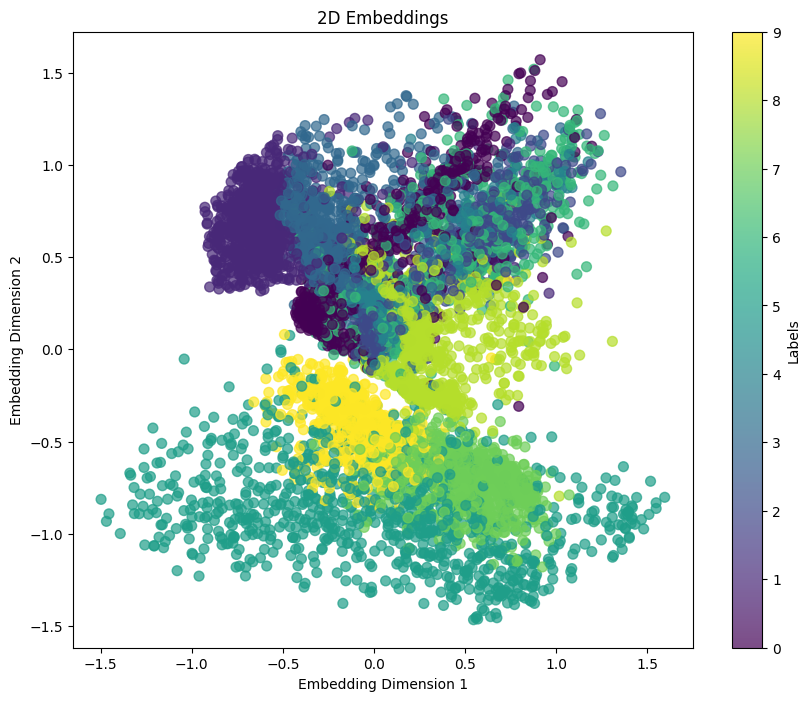

In [16]:
logger.info(f"Labels: \n{label_mapper}")
Visualisations.plot_2d_embeddings(embeddings, labels)

## 10 Dimensional Encoder Representations

In [17]:
# Instantiate the model
d10_autoencoder = AutoEncoder(embedding_size=10)
# Trainer
optimiser = torch.optim.Adam(d10_autoencoder.parameters(), lr=0.001, weight_decay=0.0005)
exponential_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimiser, gamma=0.99)
AutoEncoderTrainer.train(
    tl=train_loader, 
    vl=validation_loader, 
    model=d10_autoencoder, 
    loss_fn=torch.nn.functional.binary_cross_entropy, 
    optimiser=optimiser, 
    scheduler=exponential_scheduler, 
    epochs=20, 
    device=device
)

Auto-Encoder Training: 100%|██████████| 1174/1174 [00:18<00:00, 62.55it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 1, Loss: 0.2944750260859982, Validation Loss: 0.246200987969646
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 0: [0.00099]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:18<00:00, 64.34it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 2, Loss: 0.23464309526972307, Validation Loss: 0.22943962154952624
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 1: [0.0009801]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:18<00:00, 64.07it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 3, Loss: 0.22567234784872406, Validation Loss: 0.22439136850924893
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 2: [0.000970299]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:18<00:00, 64.00it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 4, Loss: 0.22253300373964455, Validation Loss: 0.22208693669042515
INFO:aicraft.models.AutoEncoderTrainers:LRs 

In [18]:
_val_loss = AutoEncoderTrainer.validate(
    vl=test_loader,
    model=d10_autoencoder,
    loss_fn=torch.nn.functional.binary_cross_entropy,
    device=device
)
logging.info(
    f"Post-training loss: {round(_val_loss, 4)}"
)

INFO:root:Post-training loss: 0.2191


## Test & Evaluate

In [19]:
_batch, _t_labels = next(iter(train_loader))
_batch = _batch.to(device)
_batch_reconstructed = d10_autoencoder(_batch)

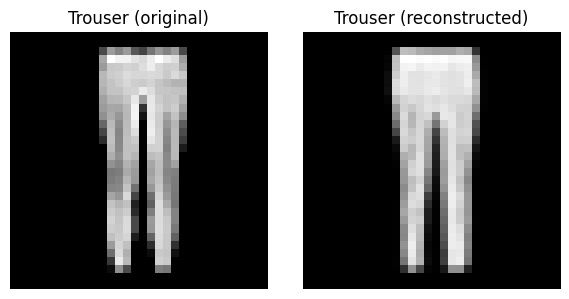

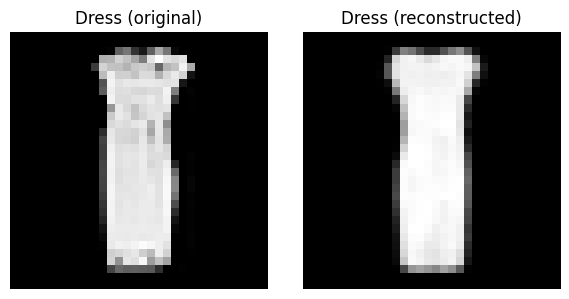

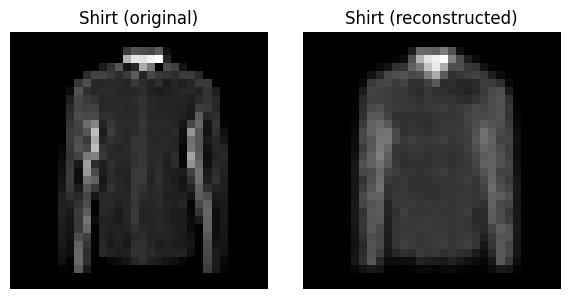

In [20]:
for i in range(3):
    Visualisations.compare_images(_batch[i], _batch_reconstructed[i], label=label_mapper[_t_labels[i].item()])

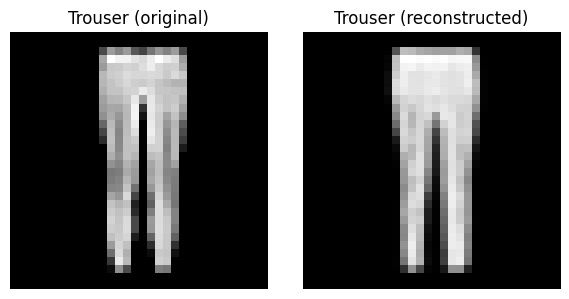

In [21]:
embeddings = d10_autoencoder.encoder(_batch)
original = _batch[0]
reconstructed = d10_autoencoder.decoder(embeddings[0].unsqueeze(0))
Visualisations.compare_images(original, reconstructed, label=label_mapper[_t_labels[0].item()])

In [22]:
embeddings, labels = d10_autoencoder.generate_embedding(x=test_loader, device=device)
logger.info(f"Size of embeddings: {embeddings.shape}")

INFO:__main__:Size of embeddings: torch.Size([10000, 10])


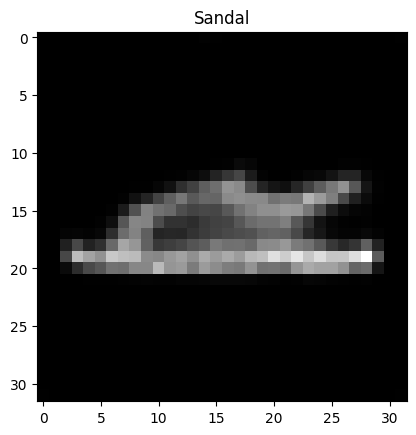

In [23]:
i = 8
reconstructed = d10_autoencoder.decoder(embeddings[i].unsqueeze(0))
Visualisations.show_image(reconstructed[0], label=label_mapper[labels[i].item()])

INFO:__main__:Labels: 
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


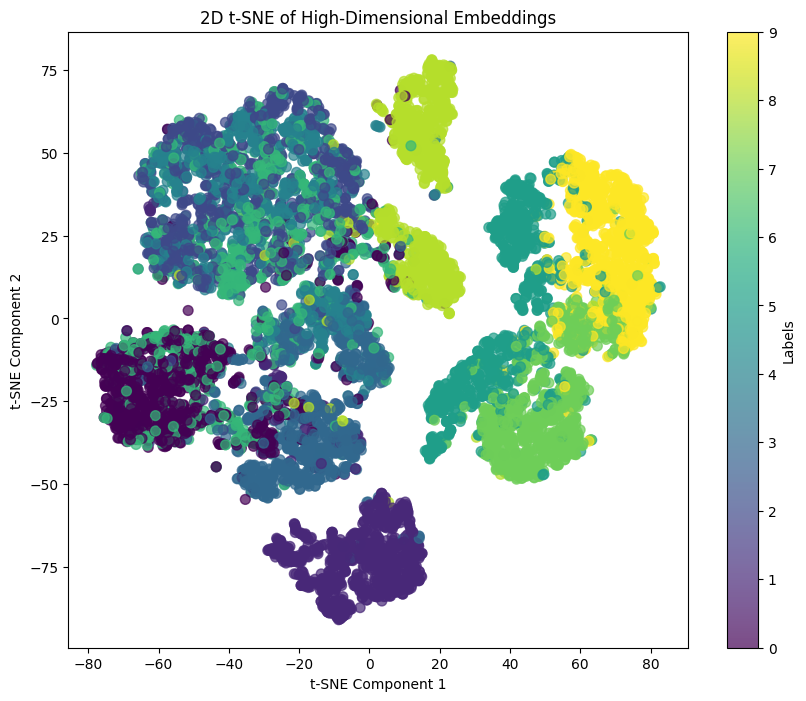

In [24]:
logger.info(f"Labels: \n{label_mapper}")
Visualisations.plot_embeddings_tsne(embeddings, labels)

# 100 Dimensional Encoder Representations

In [25]:
# Instantiate the model
d100_autoencoder = AutoEncoder(embedding_size=100)
# Trainer
optimiser = torch.optim.Adam(d100_autoencoder.parameters(), lr=0.001, weight_decay=0.0005)
exponential_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimiser, gamma=0.99)
AutoEncoderTrainer.train(
    tl=train_loader, 
    vl=validation_loader, 
    model=d100_autoencoder, 
    loss_fn=torch.nn.functional.binary_cross_entropy, 
    optimiser=optimiser, 
    scheduler=exponential_scheduler, 
    epochs=20, 
    device=device
)

Auto-Encoder Training: 100%|██████████| 1174/1174 [00:18<00:00, 65.05it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 1, Loss: 0.42052781901733227, Validation Loss: 0.3004771885071092
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 0: [0.00099]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:17<00:00, 65.56it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 2, Loss: 0.2532186885530945, Validation Loss: 0.22848825065689232
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 1: [0.0009801]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:17<00:00, 65.71it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 3, Loss: 0.21870276094549154, Validation Loss: 0.2152823739834414
INFO:aicraft.models.AutoEncoderTrainers:LRs for epoch 2: [0.000970299]
Auto-Encoder Training: 100%|██████████| 1174/1174 [00:17<00:00, 65.60it/s]
INFO:aicraft.models.AutoEncoderTrainers:Epoch 4, Loss: 0.21116989645377132, Validation Loss: 0.21013421002235122
INFO:aicraft.models.AutoEncoderTrainers:LRs 

In [26]:
_val_loss = AutoEncoderTrainer.validate(
    vl=test_loader,
    model=d100_autoencoder,
    loss_fn=torch.nn.functional.binary_cross_entropy,
    device=device
)
logging.info(
    f"Post-training loss: {round(_val_loss, 4)}"
)

INFO:root:Post-training loss: 0.2038


## Test & Evaluate

In [27]:
_batch, _t_labels = next(iter(train_loader))
_batch = _batch.to(device)
_batch_reconstructed = d10_autoencoder(_batch)

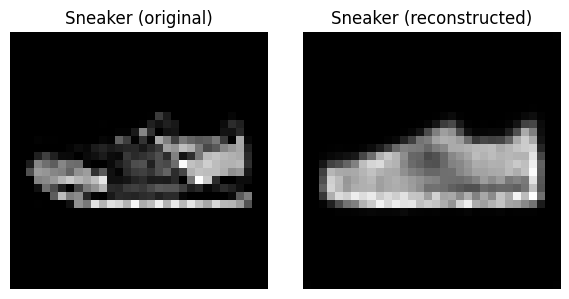

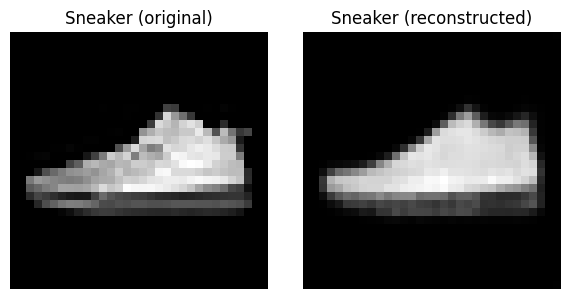

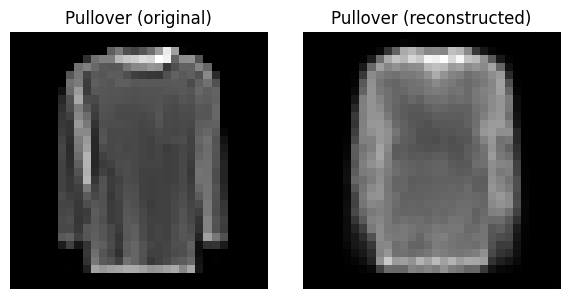

In [28]:
for i in range(3):
    Visualisations.compare_images(_batch[i], _batch_reconstructed[i], label=label_mapper[_t_labels[i].item()])

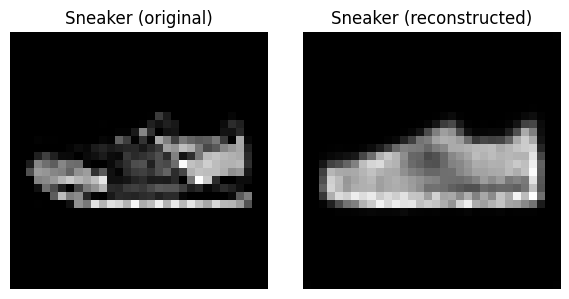

In [29]:
embeddings = d10_autoencoder.encoder(_batch)
original = _batch[0]
reconstructed = d10_autoencoder.decoder(embeddings[0].unsqueeze(0))
Visualisations.compare_images(original, reconstructed, label=label_mapper[_t_labels[0].item()])

In [30]:
embeddings, labels = d10_autoencoder.generate_embedding(x=test_loader, device=device)
logger.info(f"Size of embeddings: {embeddings.shape}")

INFO:__main__:Size of embeddings: torch.Size([10000, 10])


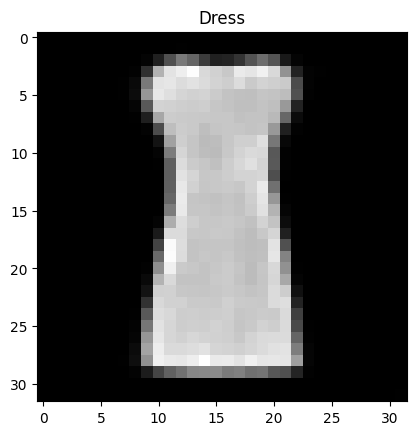

In [31]:
i = 8
reconstructed = d10_autoencoder.decoder(embeddings[i].unsqueeze(0))
Visualisations.show_image(reconstructed[0], label=label_mapper[labels[i].item()])

INFO:__main__:Labels: 
{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


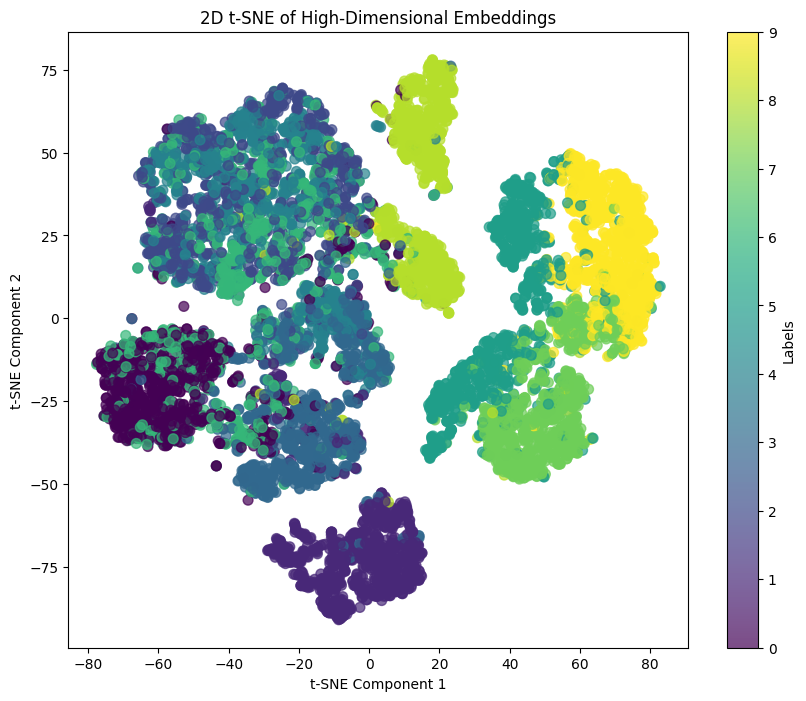

In [32]:
logger.info(f"Labels: \n{label_mapper}")
Visualisations.plot_embeddings_tsne(embeddings, labels)